# Complexité du tri

Pour évaluer la complexité d'un algorithme de tri, nous allons mesurer 

* le nombre de comparaisons 
* le nombre d'écritures dans le tableau. (ou d'échanges si c'est plus pertinent). 

Pour évaluer expérimentalement ces valeurs, nous réécrivons l'algorithme de tri pour qu'il les compte.

In [1]:
def tri_a_bulles(T):
    nb_comparaisons = nb_echanges = 0
    
    N = len(T)
    for k in range(N,1,-1):                 
        for i in range(0,k-1): 
            nb_comparaisons += 1
            if T[i] > T[i+1]:
                nb_echanges += 1
                T[i],T[i+1] = T[i+1],T[i]
                
    return nb_comparaisons, nb_echanges

Pour visualiser ces mesures, nous écrivons une fonction d'affichage avec la librairie matplotlib. Elle affiche également en pointillé les fonctions linéaires, linéarithmique et quadratique pour faciliter l'interprétation des mesures. Cette fonction sera importée d'un fichier annexe pour les tris suivants

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

def affiche_complexite(X,C1,C2,titre):
    
    fig, ax = plt.subplots()

    X2 = [ x*x for x in X ]
    XlogX = [ x*np.log2(x) for x in X ]

    plt.title("Complexité du {}".format(titre))
    plt.loglog(X,C1,label='comparaisons')
    plt.loglog(X,C2,label='echanges')
    plt.loglog(X,X2,label='quadratique',linestyle='dotted')
    plt.loglog(X,XlogX,label='linéarithmique',linestyle='dotted')
    plt.loglog(X,X,label='linéaire',linestyle='dotted')
    plt.legend()

    text = "{:>5} |{:>10} |{:>10}\n".format("N","Comp.","Ech.")
    text += "-------------------------------\n"
    for i,(x,c1,c2) in enumerate(zip(X,C1,C2)):
        if i % int(len(X)/7) == 0:
            text += "{:>5} |{:>10} |{:>10}\n".format(x,c1,c2)
    
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    font = matplotlib.font_manager.FontProperties(); 
    font.set_family('monospace'); font.set_size(14)
    ax.text(1.05, 0.95, text, transform=ax.transAxes, fontproperties=font,
        verticalalignment='top', bbox=props)

    plt.show() 



Enfin, il convient d'effectuer les mesures pour diverses tailles de tableau et éventuellement divers contenus. 

La fonction qui suit teste 50 tailles allant de 10 à 1000 selon une progression géométrique (facteur multiplicatif constant). 

Générer le contenu du tableau est sous-traité à la fonction genere_tab passée en paramètre. 

In [3]:
def evalue_complexite(algorithme, genere_tab, nom):
    
    C1 = []
    C2 = []
    X = [ int(x) for x in np.logspace(1,3,50) ]
    
    for n in X:
        T = genere_tab(n)
        comp, ech = algorithme(T)
        C1.append(comp)
        C2.append(ech)
    
    affiche_complexite(X,C1,C2,nom)

Evaluons d'abord la complexité du tri d'un tableau au contenu généré aléatoirement.

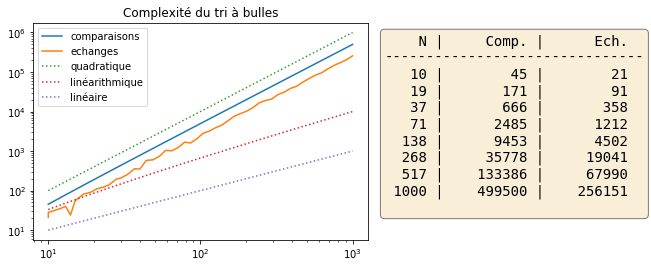

In [4]:
def tableau_aleatoire(n):
    return np.random.uniform(0,1,n)
    
evalue_complexite(tri_a_bulles, tableau_aleatoire, "tri à bulles")

Nous voyons que tant le nombre de comparaisons que le nombre d'échanges ont une **complexité quadratique $\Theta(n^2)$** pour trier $n$ éléments. 

Pour être plus précis
* le nombre de comparaisons est exactement $n(n-1)/2$ 
* le nombre d'échanges varie selon le contenu mais est de l'ordre de $n^2/4$

Il sera souvent pertinent d'effectuer deux autres tests pour évaluer la complexité de nos algorithmes. 

Le premier test consiste à trier un tableau déjà parfaitement trié.

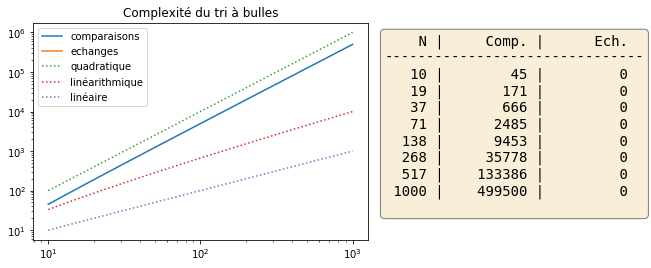

In [6]:
def tableau_trie(n):
    return range(n)
    
evalue_complexite(tri_a_bulles, tableau_trie, "tri à bulles")

On remarque que si le nombre de comparaisons ne dépend pas du contenu du tableau, le nombre d'échanges est maintenant uniformément nul. 

Le deuxième cas particulier intéressant est celui d'un tableau original trié à l'envers, i.e. dans l'ordre décroissant.

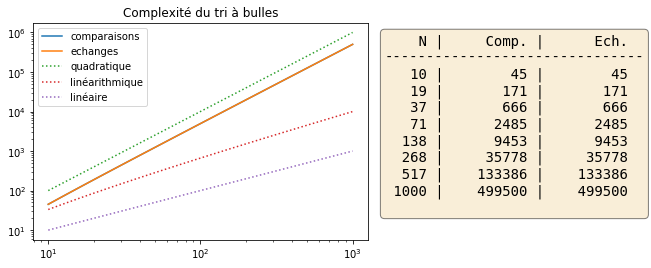

In [7]:
def tableau_trie_inverse(n):
    return list(range(n,0,-1))
    
evalue_complexite(tri_a_bulles, tableau_trie_inverse, "tri à bulles")

On se trouve maintenant avec un nombre de comparaisons toujours inchangé mais un nombre d'échanges égal au nombre de comparaisons. Tous les tests de comparaisons renvoient `True` et il y a donc échange à chaque fois. 

Notons que cela ne change rien à la complexité du tri à bulles qui est toujours dominée par celle du nombre de comparaisons.

La complexité du tri à bulles est donc **quadratique, indépendemment du contenu à trier.**

## Complexité spatiale

L'analyse précédente ne s'intéresse qu'à l'utilisation d'une ressource: le **temps de calcul**. 

Dans certains cas, il est aussi pertinent de s'intéresser à une autre ressource importante: la **quantité de mémoire** utilisée. 

Pour le **tri à bulles, cette complexité spatiale est constante,** $\Theta(1)$. En effet la mémoire supplémentaire nécessaire pour trier le tableau inclut
* les deux compteurs de boucle
* un élément temporaire utilisé lors des échanges

la quantité de mémoire est donc indépendante de la taille du tableau à trier. 

Ce sera aussi le cas le tri par sélection, le tri par insertion et le tri de Shell que nous verrons par la suite. Nous renviendrons sur ce problème pour les **tri par fusion et tri rapide**. 

[ASD1 Notebooks on GitHub.io](https://ocuisenaire.github.io/ASD1-notebooks/)

© Olivier Cuisenaire, 2018